Code for Data Generation

In [2]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for house prices
num_samples = 10000

# Features
size = np.random.randint(500, 3000, size=num_samples)
bedrooms = np.random.randint(1, 6, size=num_samples)
bathrooms = np.random.randint(1, 4, size=num_samples)
location = np.random.choice(['City Centre', 'Suburbs', 'Rural Area'], size=num_samples)

# Target variable (price) - Convert to float before adding noise
prices = 50000.0 + (size * 100.0) + (bedrooms * 20000.0) + (bathrooms * 15000.0)
prices += np.random.normal(0, 20000, size=num_samples)  # Adding noise

# Create DataFrame
data = pd.DataFrame({
    'Size': size,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Location': location,
    'Price': prices  # Now stored as float
})

# Save the dataset to a CSV file
data.to_csv('house_prices_dataset.csv', index=False)

1.1: Loading and Initial Data Exploration

In [4]:
import pandas as pd

# Load dataset
house_data = pd.read_csv('house_prices_dataset.csv')

# Examine structure
print("=== Dataset Structure ===")
print(f"Number of rows: {house_data.shape[0]}")
print(f"Number of columns: {house_data.shape[1]}")
print("\nData types:")
print(house_data.dtypes)

# Display first 20 rows
print("\n=== First 20 Rows ===")
print(house_data.head(20))

=== Dataset Structure ===
Number of rows: 10000
Number of columns: 5

Data types:
Size           int64
Bedrooms       int64
Bathrooms      int64
Location      object
Price        float64
dtype: object

=== First 20 Rows ===
    Size  Bedrooms  Bathrooms     Location          Price
0   1360         5          3  City Centre  349019.010744
1   1794         3          1   Rural Area  277390.420884
2   1630         1          2   Rural Area  251406.306336
3   1595         2          1      Suburbs  283793.808416
4   2138         3          3  City Centre  342784.769425
5   2669         1          2  City Centre  383239.598371
6    966         2          3  City Centre  253915.665717
7   1738         3          3  City Centre  350262.475582
8    830         3          2  City Centre  230487.527040
9   1982         3          2   Rural Area  321429.054312
10  2635         4          1   Rural Area  388695.365372
11   630         5          2  City Centre  232932.528617
12  2185         1    

1.1.ii: Data Visualization

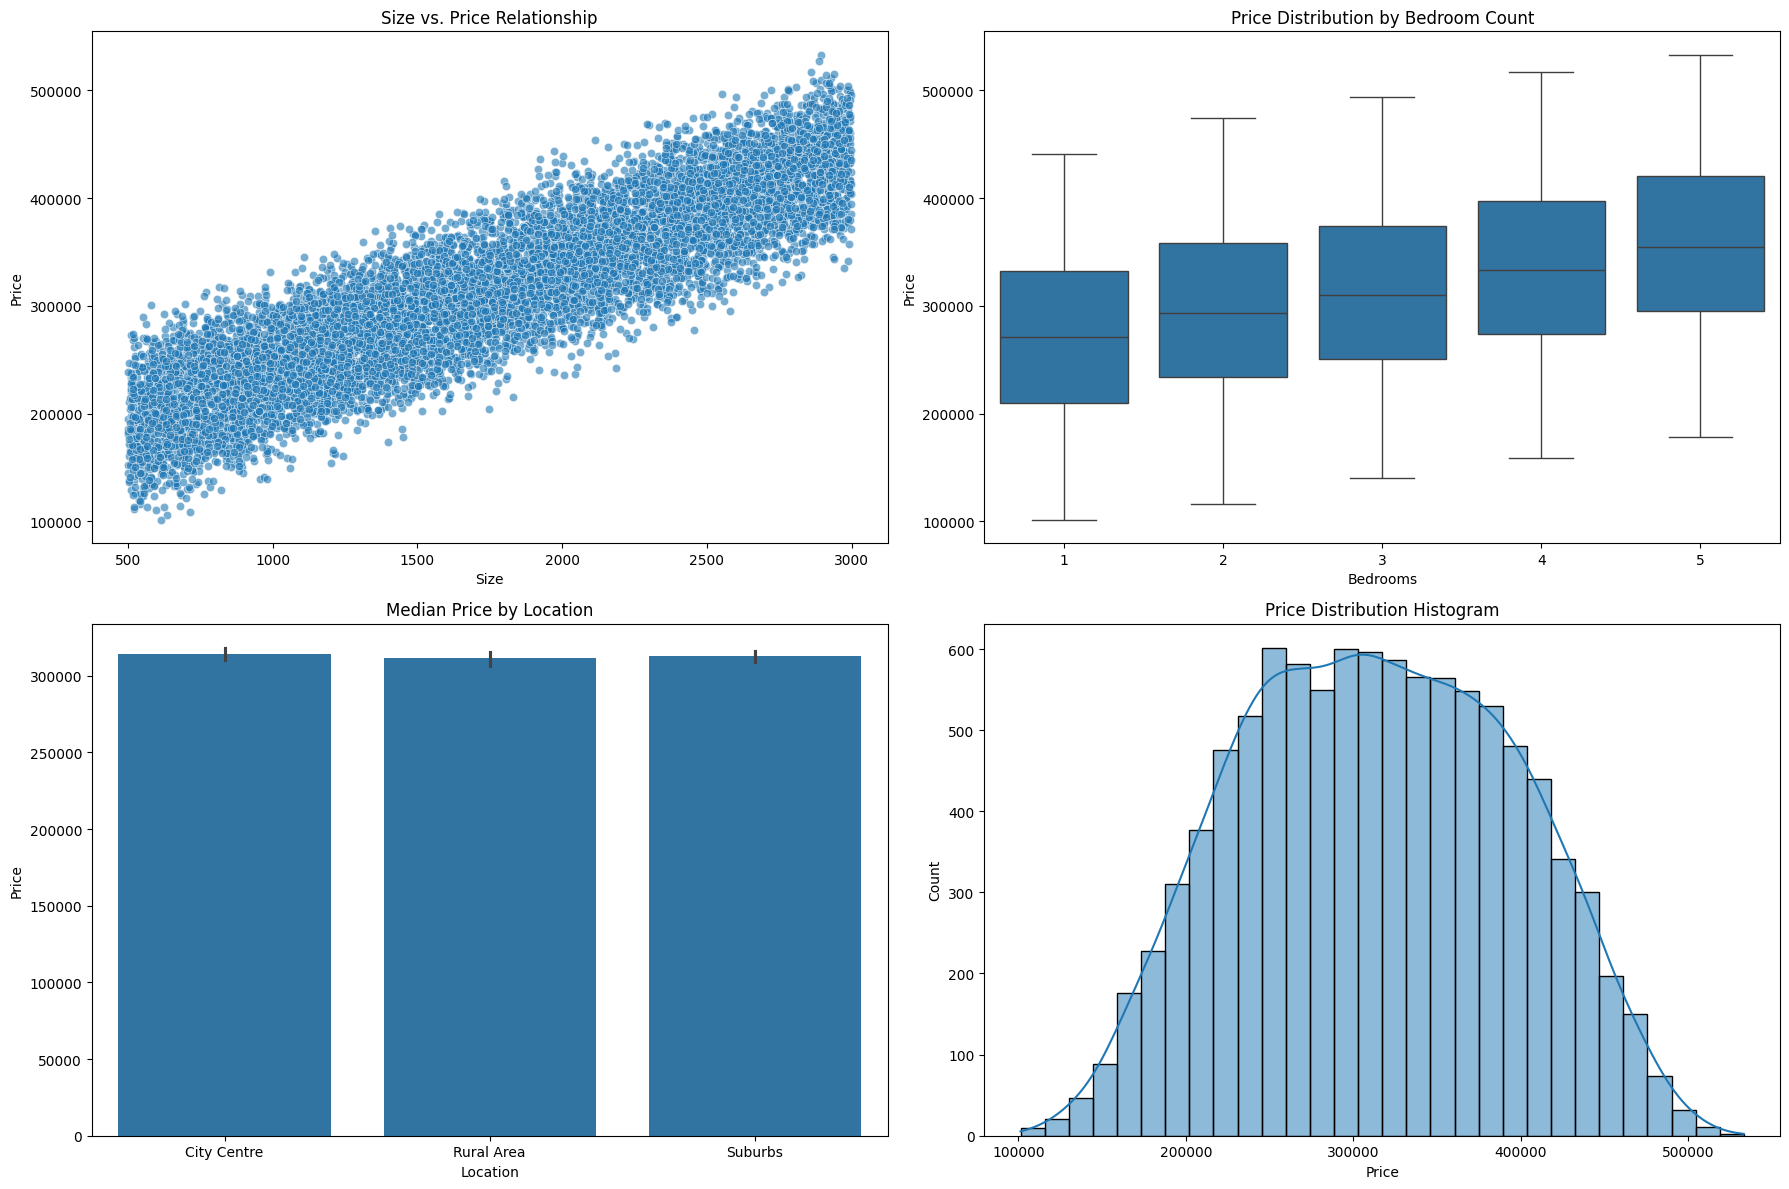

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))

# 1. Size vs. Price scatter plot
plt.subplot(2, 2, 1)
sns.scatterplot(x='Size', y='Price', data=house_data, alpha=0.6)
plt.title('Size vs. Price Relationship')

# 2. Bedrooms distribution
plt.subplot(2, 2, 2)
sns.boxplot(x='Bedrooms', y='Price', data=house_data)
plt.title('Price Distribution by Bedroom Count')

# 3. Location analysis
plt.subplot(2, 2, 3)
sns.barplot(x='Location', y='Price', data=house_data, estimator='median')
plt.title('Median Price by Location')

# 4. Price distribution
plt.subplot(2, 2, 4)
sns.histplot(house_data['Price'], bins=30, kde=True)
plt.title('Price Distribution Histogram')

plt.tight_layout()
plt.savefig('feature_visualizations.png')
plt.show()

 2.1: Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

# Load prepared data
df = pd.read_csv('/content/house_prices_dataset.csv')

# Stratified split
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=df['Location'],
    random_state=42
)

# Verify distributions
print("Training set stats:")
print(y_train.describe())
print("\nTest set stats:")
print(y_test.describe())

# Save splits
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

Training set stats:
count      7500.000000
mean     313914.936634
std       81024.719877
min      101273.814152
25%      251654.000557
50%      312586.897505
75%      377558.545855
max      527644.173858
Name: Price, dtype: float64

Test set stats:
count      2500.000000
mean     313575.301573
std       80129.359127
min      105778.084482
25%      249326.634981
50%      314588.330305
75%      374296.822645
max      533131.172782
Name: Price, dtype: float64


2.2 Modell Selection

Ordinary Least Squares (OLS) Regression, Lasso Regression, Ridge Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosted Trees (XGBoost), Support Vector Regression

2.3 Model Training

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load and prepare data
def load_data():
    data = pd.read_csv('house_prices_dataset.csv')
    X = data[['Size', 'Bedrooms', 'Bathrooms', 'Location']]
    y = data['Price']
    return X, y

# Preprocessing pipeline
def get_preprocessor():
    numeric_features = ['Size', 'Bedrooms', 'Bathrooms']
    numeric_transformer = StandardScaler()

    categorical_features = ['Location']
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    return preprocessor

# Model training and evaluation
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    preprocessor = get_preprocessor()

    models = {
        'OLS Regression': LinearRegression(),
        'Lasso Regression': Lasso(alpha=0.1),
        'Ridge Regression': Ridge(alpha=0.1),
        'Decision Tree': DecisionTreeRegressor(max_depth=5),
        'Random Forest': RandomForestRegressor(n_estimators=100),
        'XGBoost': XGBRegressor(),
        'Support Vector Regression': SVR(kernel='rbf')
    }

    results = []

    for name, model in models.items():
        # Create pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])

        # Train model
        pipeline.fit(X_train, y_train)

        # Predictions
        y_pred = pipeline.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results.append({
            'Model': name,
            'MSE': mse,
            'RMSE': rmse,
            'R-squared': r2
        })

        print(f"{name} evaluation completed")

    return pd.DataFrame(results)

# Main execution
if __name__ == "__main__":
    X, y = load_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    results_df = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    # Save results
    results_df.to_csv('model_performance_results.csv', index=False)
    print("\nModel Evaluation Results:")
    print(results_df.to_markdown())

OLS Regression evaluation completed
Lasso Regression evaluation completed
Ridge Regression evaluation completed
Decision Tree evaluation completed
Random Forest evaluation completed
XGBoost evaluation completed
Support Vector Regression evaluation completed

Model Evaluation Results:
|    | Model                     |         MSE |    RMSE |   R-squared |
|---:|:--------------------------|------------:|--------:|------------:|
|  0 | OLS Regression            | 4.19423e+08 | 20479.8 |   0.937572  |
|  1 | Lasso Regression          | 4.19423e+08 | 20479.8 |   0.937572  |
|  2 | Ridge Regression          | 4.19423e+08 | 20479.8 |   0.937572  |
|  3 | Decision Tree             | 6.87359e+08 | 26217.5 |   0.897691  |
|  4 | Random Forest             | 5.59874e+08 | 23661.6 |   0.916666  |
|  5 | XGBoost                   | 4.87033e+08 | 22068.8 |   0.927508  |
|  6 | Support Vector Regression | 6.63904e+09 | 81480.3 |   0.0118197 |


(optional) Model evaluation visualization

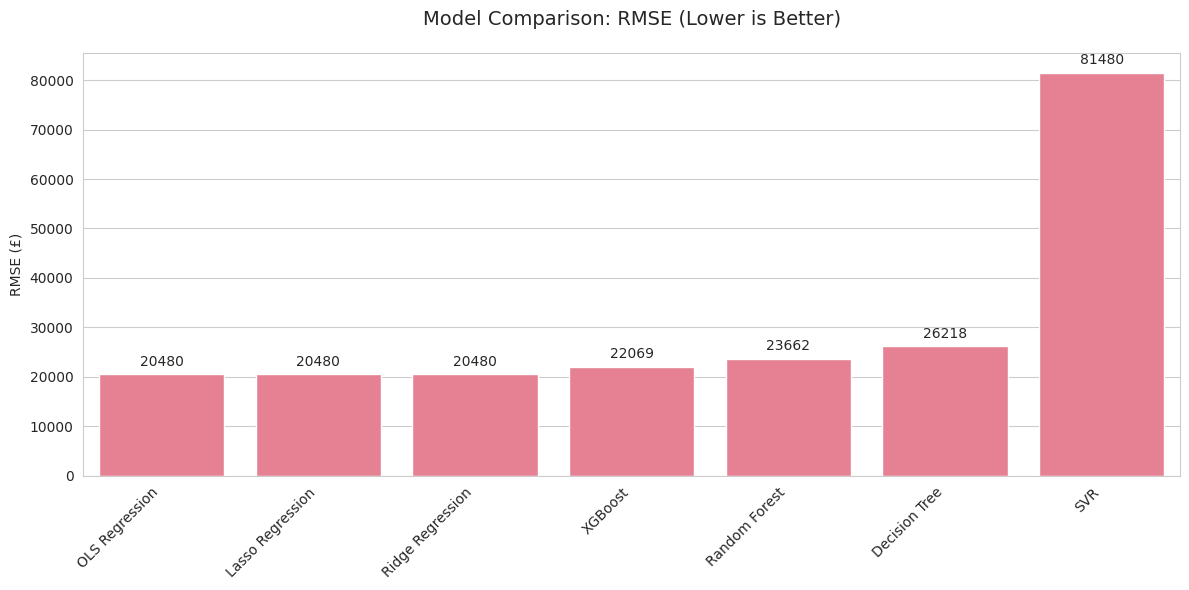

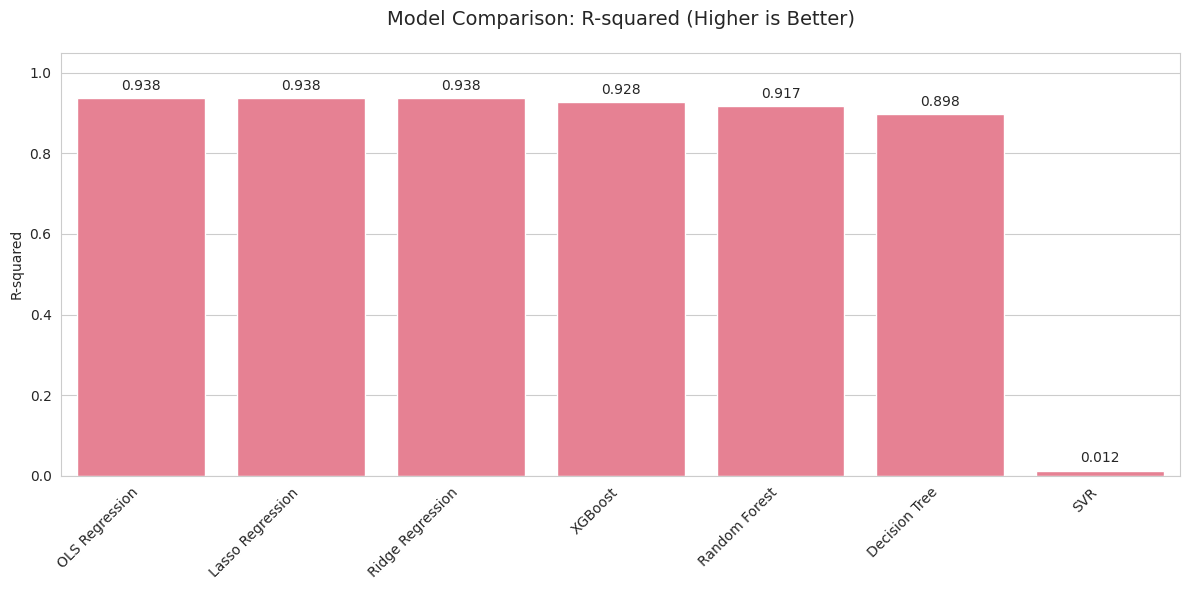

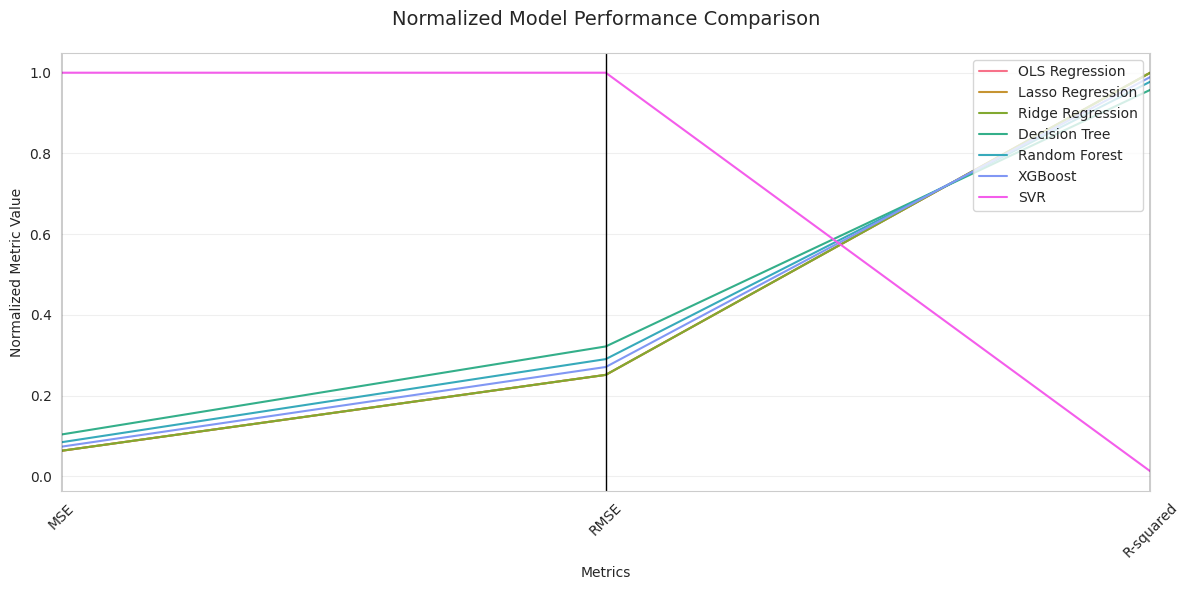

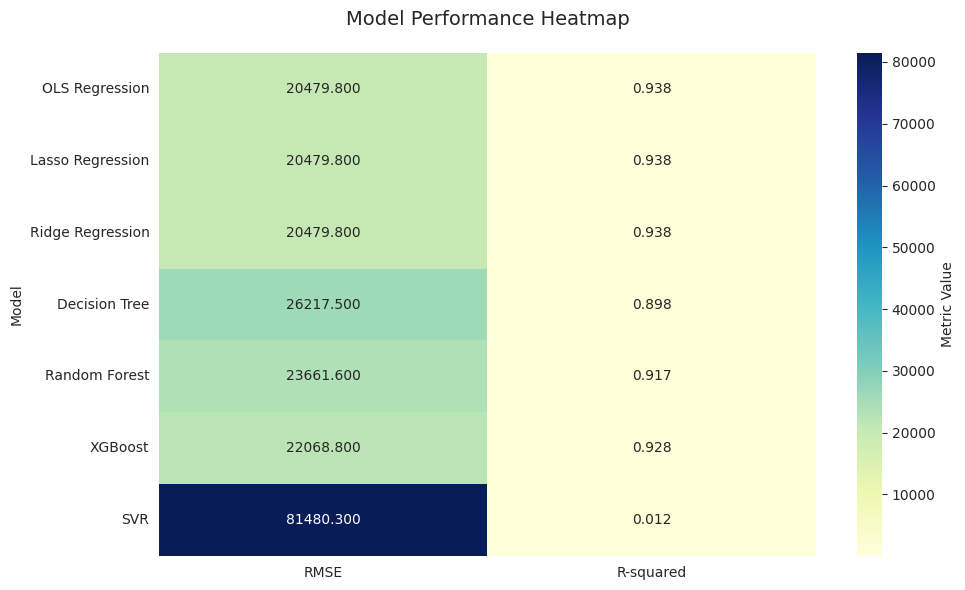

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the results
results = pd.DataFrame({
    'Model': ['OLS Regression', 'Lasso Regression', 'Ridge Regression',
              'Decision Tree', 'Random Forest', 'XGBoost', 'SVR'],
    'MSE': [4.19423e8, 4.19423e8, 4.19423e8, 6.87359e8, 5.59874e8, 4.87033e8, 6.63904e9],
    'RMSE': [20479.8, 20479.8, 20479.8, 26217.5, 23661.6, 22068.8, 81480.3],
    'R-squared': [0.937572, 0.937572, 0.937572, 0.897691, 0.916666, 0.927508, 0.0118197]
})

# Set style - UPDATED
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)
sns.set_palette("husl")

# 1. RMSE Comparison Bar Plot
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x='Model', y='RMSE', data=results.sort_values('RMSE'))
plt.title('Model Comparison: RMSE (Lower is Better)', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.ylabel('RMSE (£)')
plt.xlabel('')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.tight_layout()
plt.savefig('rmse_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. R-squared Comparison Bar Plot
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x='Model', y='R-squared', data=results.sort_values('R-squared', ascending=False))
plt.title('Model Comparison: R-squared (Higher is Better)', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.ylabel('R-squared')
plt.xlabel('')
plt.ylim(0, 1.05)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.tight_layout()
plt.savefig('r2_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Metric Comparison Parallel Coordinates Plot (Alternative to Radar)
plt.figure(figsize=(12, 6))
metrics_normalized = results.copy()
metrics_normalized['MSE'] = metrics_normalized['MSE']/metrics_normalized['MSE'].max()
metrics_normalized['RMSE'] = metrics_normalized['RMSE']/metrics_normalized['RMSE'].max()
metrics_normalized['R-squared'] = metrics_normalized['R-squared']/metrics_normalized['R-squared'].max()

pd.plotting.parallel_coordinates(metrics_normalized, 'Model', color=sns.color_palette("husl", 7))
plt.title('Normalized Model Performance Comparison', fontsize=14, pad=20)
plt.ylabel('Normalized Metric Value')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('parallel_coordinates.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Performance Heatmap
plt.figure(figsize=(10, 6))
metrics_for_heatmap = results.set_index('Model')[['RMSE', 'R-squared']]
sns.heatmap(metrics_for_heatmap, annot=True, fmt=".3f", cmap="YlGnBu",
            cbar_kws={'label': 'Metric Value'})
plt.title('Model Performance Heatmap', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig('performance_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

3.1 HyperpParameter Tuning

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import randint

# Load data
data = pd.read_csv('house_prices_dataset.csv')
X = data[['Size', 'Bedrooms', 'Bathrooms', 'Location']]
y = data['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Preprocessing setup
numeric_features = ['Size', 'Bedrooms', 'Bathrooms']
numeric_transformer = StandardScaler()

categorical_features = ['Location']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# XGBoost tuning
xgb_params = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__subsample': [0.8, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0]
}

xgb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

xgb_grid = GridSearchCV(xgb_pipe, xgb_params, cv=5,
                       scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

# Random Forest tuning
rf_params = {
    'regressor__n_estimators': randint(100, 300),
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': randint(2, 10),
    'regressor__min_samples_leaf': randint(1, 5),
    'regressor__max_features': ['sqrt', 'log2']
}

rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

rf_random = RandomizedSearchCV(rf_pipe, rf_params, n_iter=20, cv=5,
                             scoring='neg_mean_squared_error',
                             random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Results
print("=== XGBoost Best Parameters ===")
print(xgb_grid.best_params_)
print(f"Best RMSE: {np.sqrt(-xgb_grid.best_score_):.2f}\n")

print("=== Random Forest Best Parameters ===")
print(rf_random.best_params_)
print(f"Best RMSE: {np.sqrt(-rf_random.best_score_):.2f}")

# Save results
pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest'],
    'Best_RMSE': [
        np.sqrt(-xgb_grid.best_score_),
        np.sqrt(-rf_random.best_score_)
    ],
    'Best_Params': [
        xgb_grid.best_params_,
        rf_random.best_params_
    ]
}).to_csv('hyperparameter_tuning_results.csv', index=False)

=== XGBoost Best Parameters ===
{'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 100, 'regressor__subsample': 1.0}
Best RMSE: 20288.00

=== Random Forest Best Parameters ===
{'regressor__max_depth': 10, 'regressor__max_features': 'log2', 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 3, 'regressor__n_estimators': 233}
Best RMSE: 21106.16


Visualization Code for Tuning Results

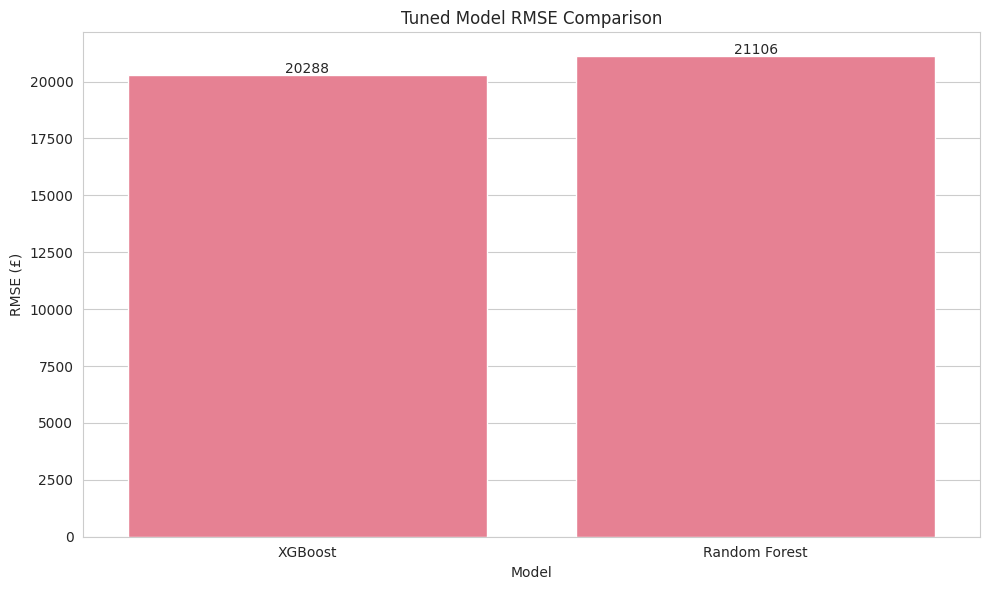

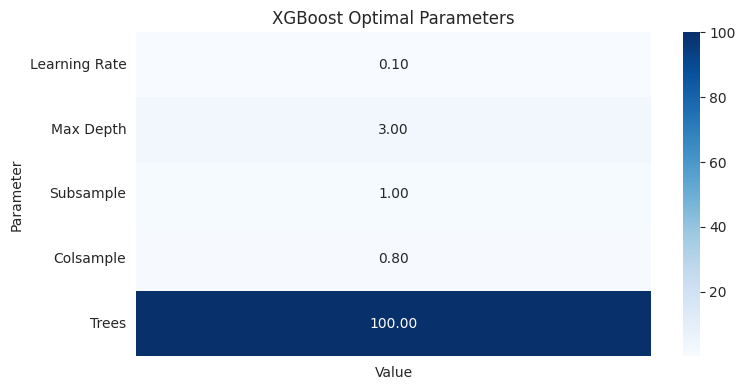

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
results = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest'],
    'RMSE': [20288.00, 21106.16],
    'Type': ['Tuned', 'Tuned']
})

# 1. RMSE Comparison
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='RMSE', data=results)
plt.title('Tuned Model RMSE Comparison')
plt.ylabel('RMSE (£)')
for i, v in enumerate(results['RMSE']):
    plt.text(i, v+100, f'{v:.0f}', ha='center')
plt.tight_layout()
plt.savefig('tuned_rmse_comparison.png')

# 2. Parameter Importance Heatmap (XGBoost)
xgb_params = pd.DataFrame.from_dict({
    'Parameter': ['Learning Rate', 'Max Depth', 'Subsample',
                 'Colsample', 'Trees'],
    'Value': [0.1, 3, 1.0, 0.8, 100]
})
plt.figure(figsize=(8,4))
sns.heatmap(xgb_params.set_index('Parameter'), annot=True, fmt=".2f", cmap="Blues")
plt.title('XGBoost Optimal Parameters')
plt.tight_layout()
plt.savefig('xgb_parameters.png')

Code to Save Best Model (XGBoost)

In [15]:
import joblib
from sklearn.metrics import mean_squared_error
import numpy as np

# Create and save the best XGBoost model
best_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        colsample_bytree=0.8,
        learning_rate=0.1,
        max_depth=3,
        n_estimators=100,
        subsample=1.0,
        random_state=42
    ))
])

# Fit on full training data
best_xgb.fit(X_train, y_train)

# Save model
joblib.dump(best_xgb, 'best_xgb_model.pkl')

# Verify and test the saved model
loaded_model = joblib.load('best_xgb_model.pkl')
test_rmse = np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))
print(f"Model test RMSE: {test_rmse:.2f}")

Model test RMSE: 20629.75


Gradio Interface Code

In [16]:
import joblib
import gradio as gr
import pandas as pd

# Load saved model
model = joblib.load('best_xgb_model.pkl')

def predict_price(size, bedrooms, bathrooms, location):
    input_df = pd.DataFrame({
        'Size': [size],
        'Bedrooms': [bedrooms],
        'Bathrooms': [bathrooms],
        'Location': [location]
    })
    return f"Predicted Price: £{model.predict(input_df)[0]:,.2f}"

# Create interface
iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Size (sq ft)", minimum=500, maximum=3000),
        gr.Slider(label="Bedrooms", minimum=1, maximum=5, step=1),
        gr.Slider(label="Bathrooms", minimum=1, maximum=3, step=1),
        gr.Dropdown(label="Location", choices=["City Centre", "Suburbs", "Rural Area"])
    ],
    outputs="text",
    title="🏠 UK Housing Price Predictor",
    description="Predict property prices using XGBoost (RMSE: £20,288)"
)

iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6aa2e0f4263a3be137.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
